# Python  exceptions

##  Handling exceptions



In [7]:
try:
    num = input("Enter the first number: ")
    denom = input("Enter the second number: ")
    n = int(num)
    d = int(denom)
    result = n/d
except ZeroDivisionError as e:
    print("You can't divide by zero")
    print(e)
except ValueError as e:
    print("you didn't enter a number")
    print(e)
else:
    print(result)
finally:
    print("Goodbye")


27302.70588235294
Goodbye


## Common exception types



In [10]:
int_list = [0,3,6,1,8,7,3,5]
print(int_list["a"])

TypeError: list indices must be integers or slices, not str

In [13]:
my_dic = {1:"one",2:"two",3:"three",4:"four",5:"five"}
my_dic[6]

KeyError: 6

In [14]:
with open("myfile.txt","r") as f:
    print(f)

FileNotFoundError: [Errno 2] No such file or directory: 'myfile.txt'

## Custom exceptions


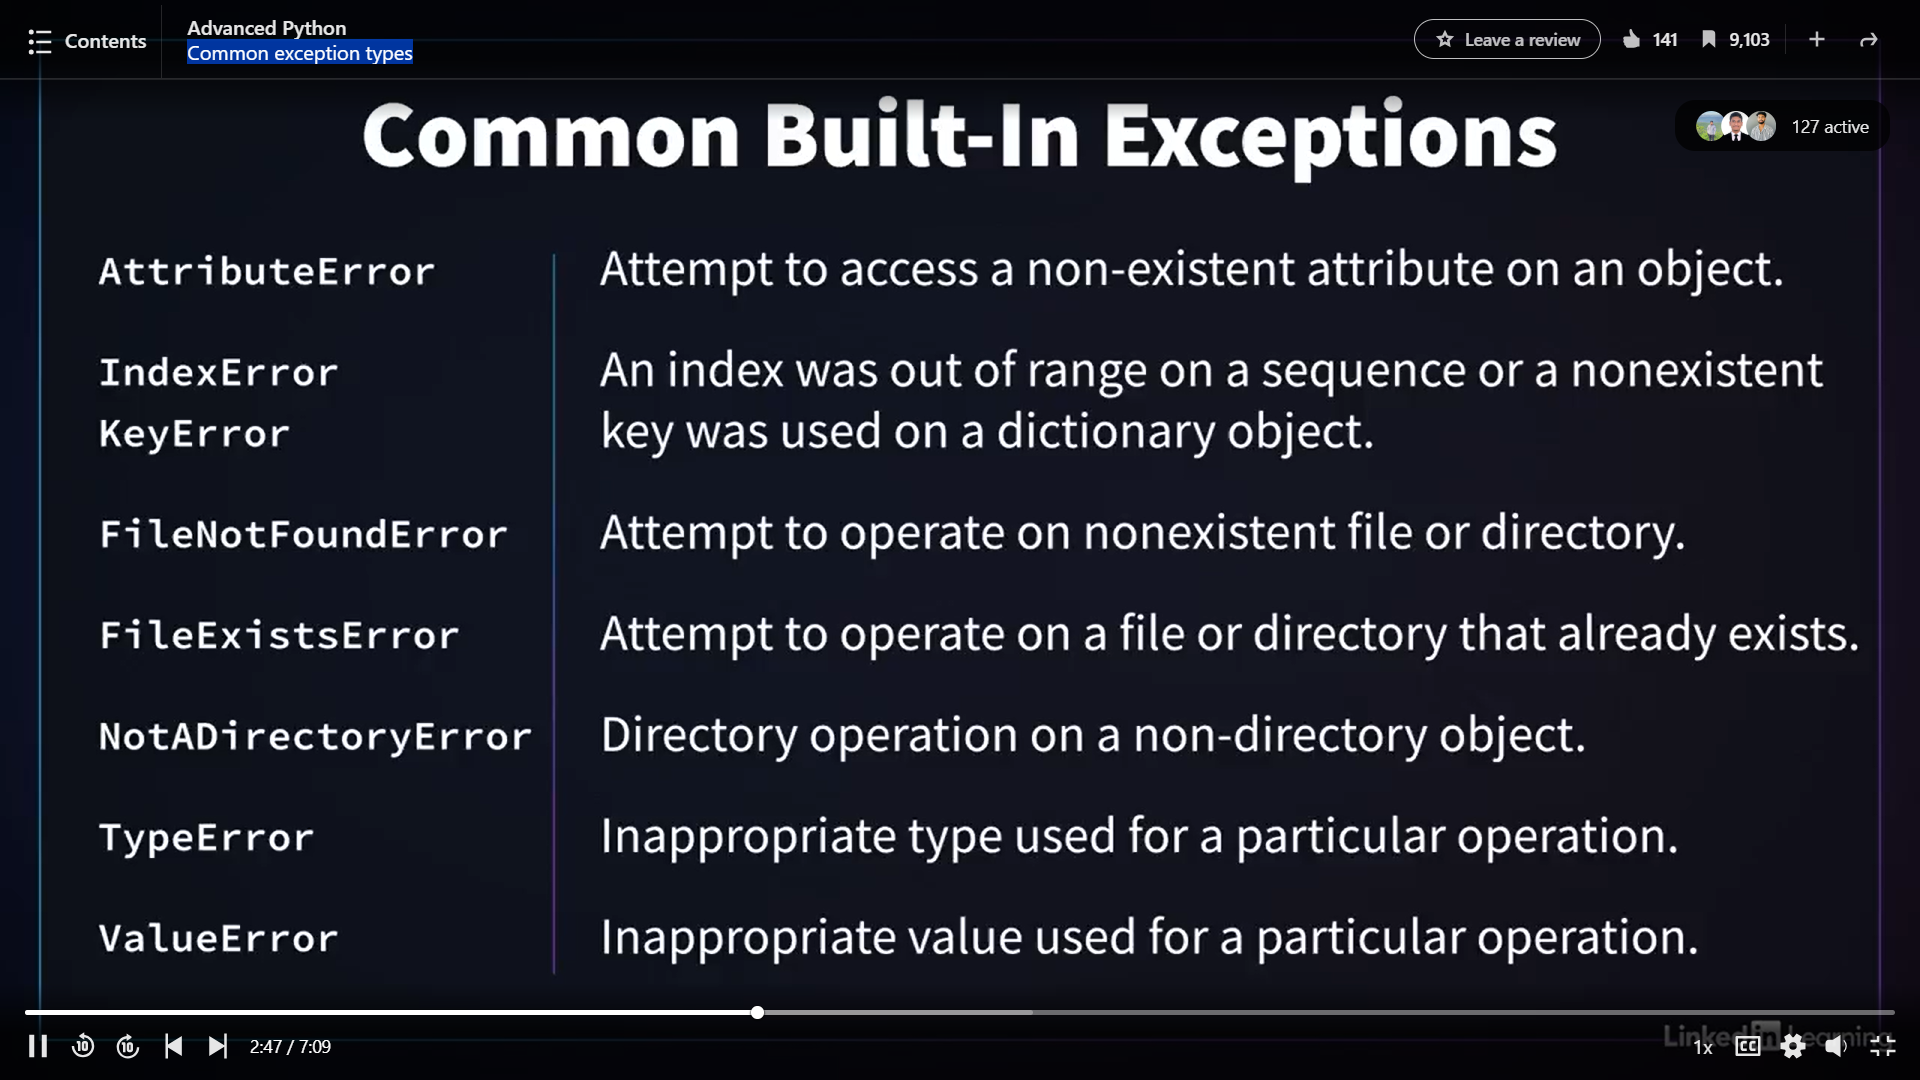

In [1]:
class InsufficientFundsError(Exception):
    def __init__(self, balance, amount):
        message = f"Insufficient balance: {balance:.2f} (required : {amount:.2f})"
        super().__init__(message)



In [2]:
class BankAccount:
    def __init__(self, balance):
        self.balance = balance

    def deposit(self, amount):
        self.balance += amount

    def withdraw(self, amount):
        if amount > self.balance:
            raise InsufficientFundsError(self.balance, amount)
        self.balance -= amount

    def get_balance(self):
        return self.balance


In [9]:
account = BankAccount(100)
try:
    account.deposit(10)
    account.withdraw(40)
    account.withdraw(1000)

except InsufficientFundsError as e:
    print('Error: ', e)
else:
    print('You have successfully withdrawn your account')


finally:
    print(f"Current balance: {account.get_balance():.2f}")

Error:  (70, 1000)
Current balance: 70.00


## Challenge: Exceptions



In [14]:
# 1. Implement the InvalidTempError exception class
class InvalidTempError(Exception):
    def __init__(self, temp):
        self.temp = temp
        self.message = f"Invalid Temperature: {temp}. Temperature must be between 100 and 500."
        super().__init__(self.message)

class DigitalOven:
    def __init__(self):
        self.temp = 0

    def set_temp(self, temp):
        # 2. උෂ්ණත්වය පරීක්ෂා කර error එක raise කිරීම
        if temp < 100 or temp > 500:
            raise InvalidTempError(temp)
        self.temp = temp

    def get_temp(self):
        return self.temp

def test_oven(test_temp):
    global oven
    try:
        oven.set_temp(test_temp)
        print(f"Successfully set temp to {test_temp}")
    # 3. අපේ Custom Error එක අල්ලා ගැනීම
    except InvalidTempError as e:
        print(e.message)
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
    finally:
        # මචන්, finally එක හැමවෙලේම වැඩ කරන නිසා
        # වැරදුණත් නැතත් දැනට තියෙන temp එක පෙන්වනවා
        print(f"Current temp setting is {oven.get_temp()}\n")

# Testing the code
oven = DigitalOven()

# පරීක්ෂණ කිහිපයක්
test_oven(250) # නිවැරදි අගයක්
test_oven(50)  # අඩු වැඩි අගයක් (Error)
test_oven(600) # වැඩි අගයක් (Error)
test_oven(300)
test_oven(1000)

Successfully set temp to 250
Current temp setting is 250

Invalid Temperature: 50. Temperature must be between 100 and 500.
Current temp setting is 250

Invalid Temperature: 600. Temperature must be between 100 and 500.
Current temp setting is 250

Successfully set temp to 300
Current temp setting is 300

Invalid Temperature: 1000. Temperature must be between 100 and 500.
Current temp setting is 300

